In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

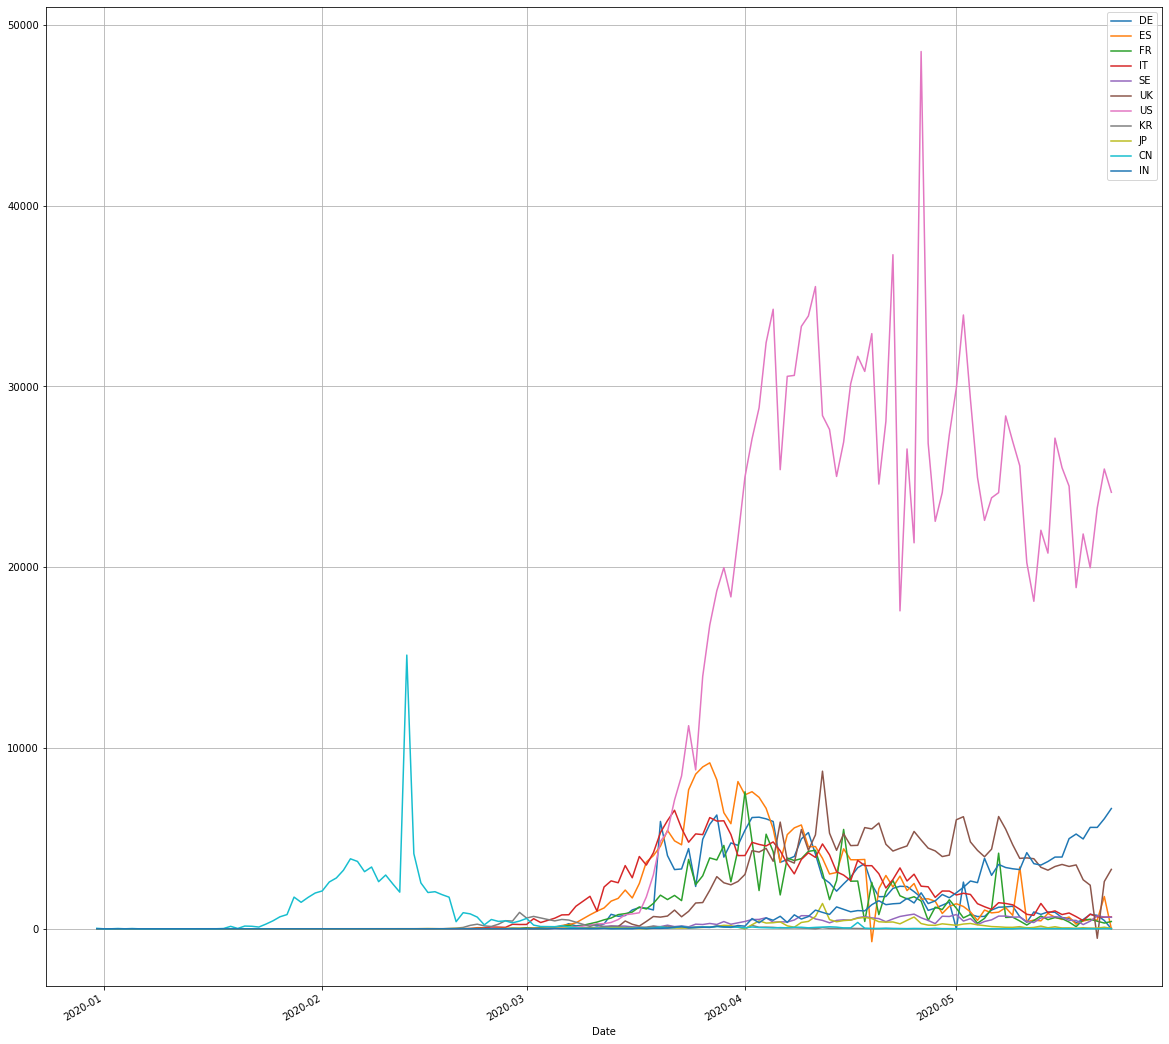

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

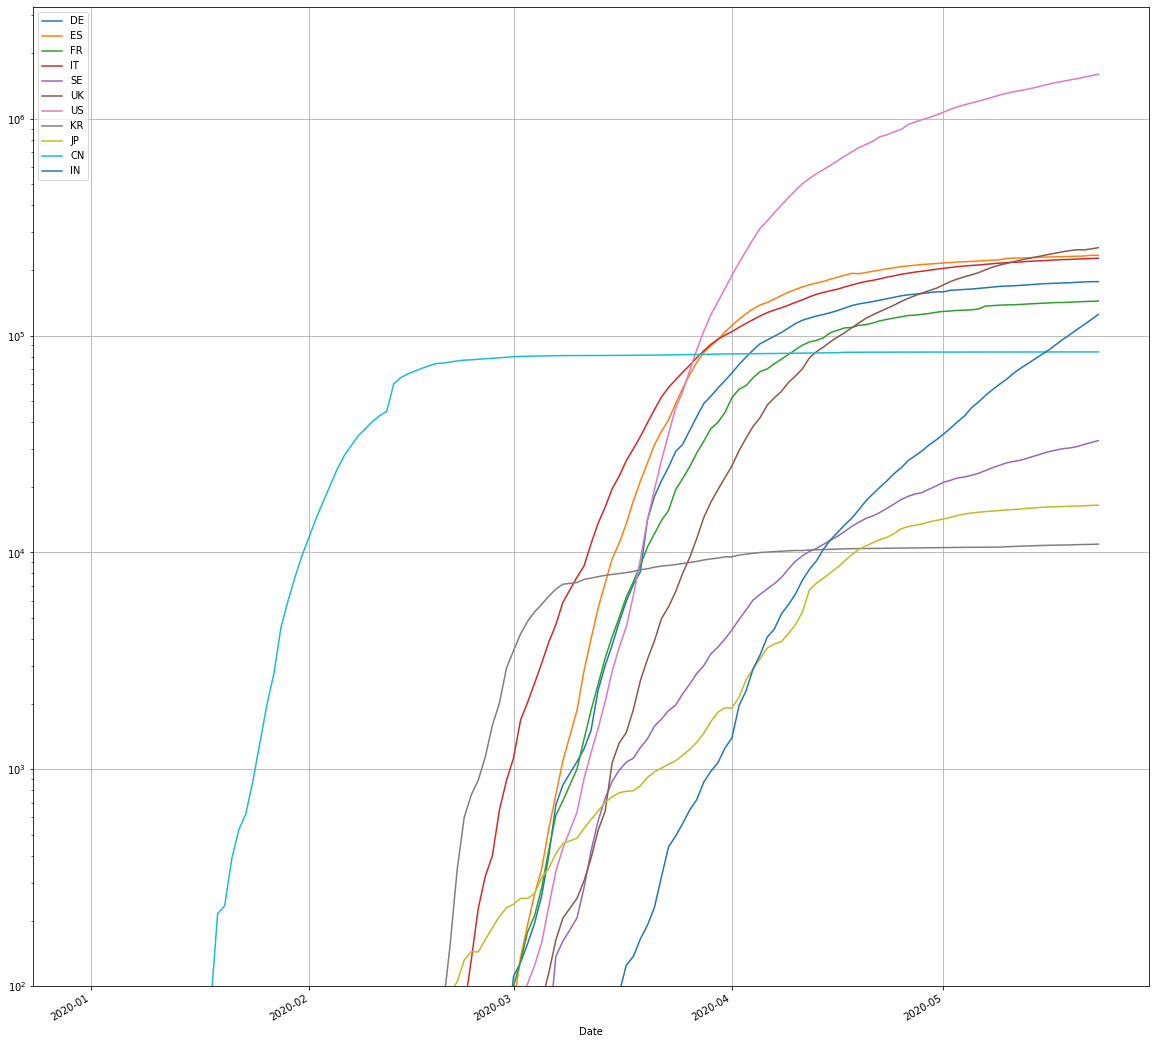

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

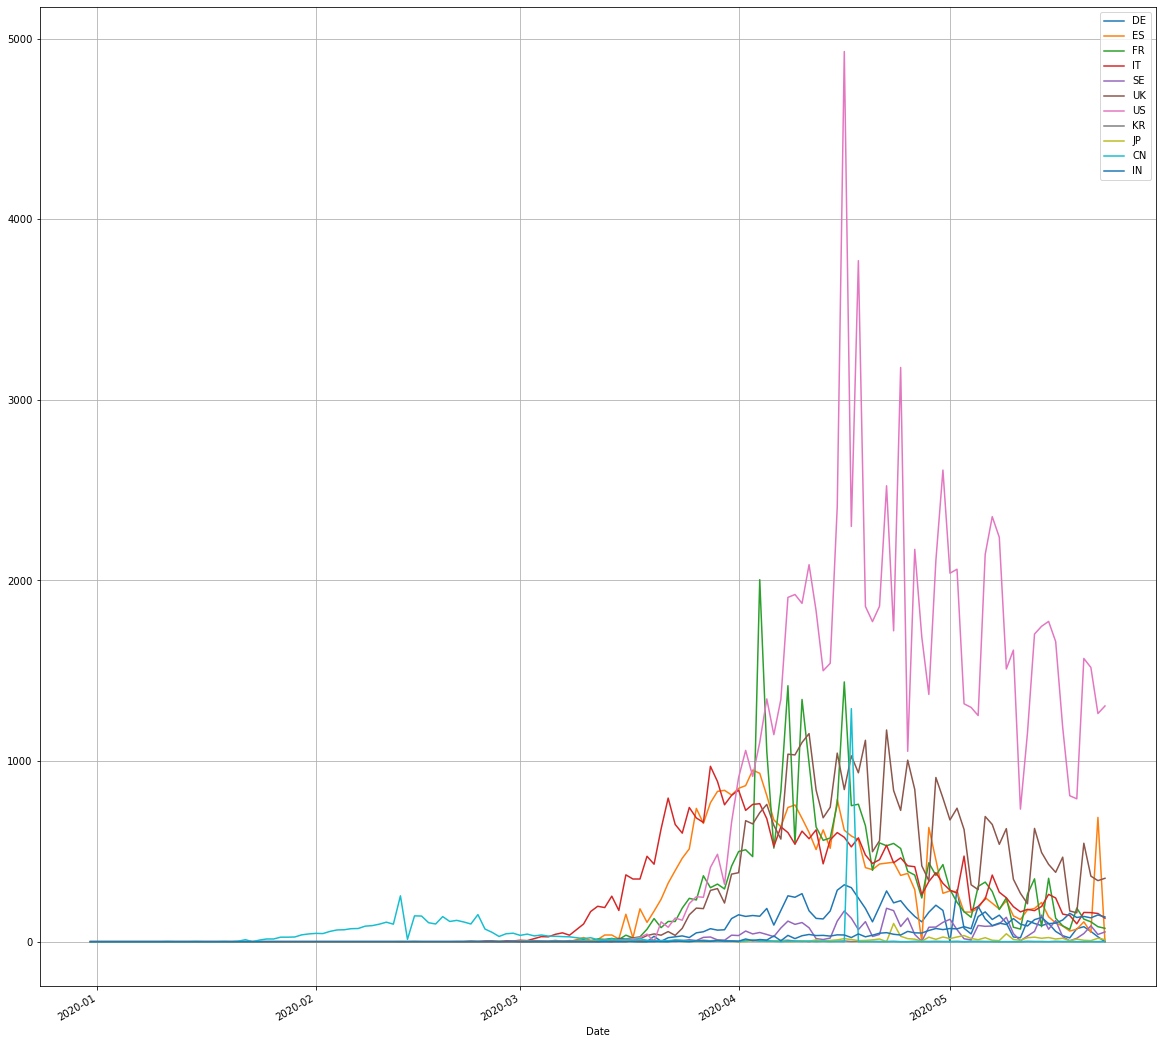

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

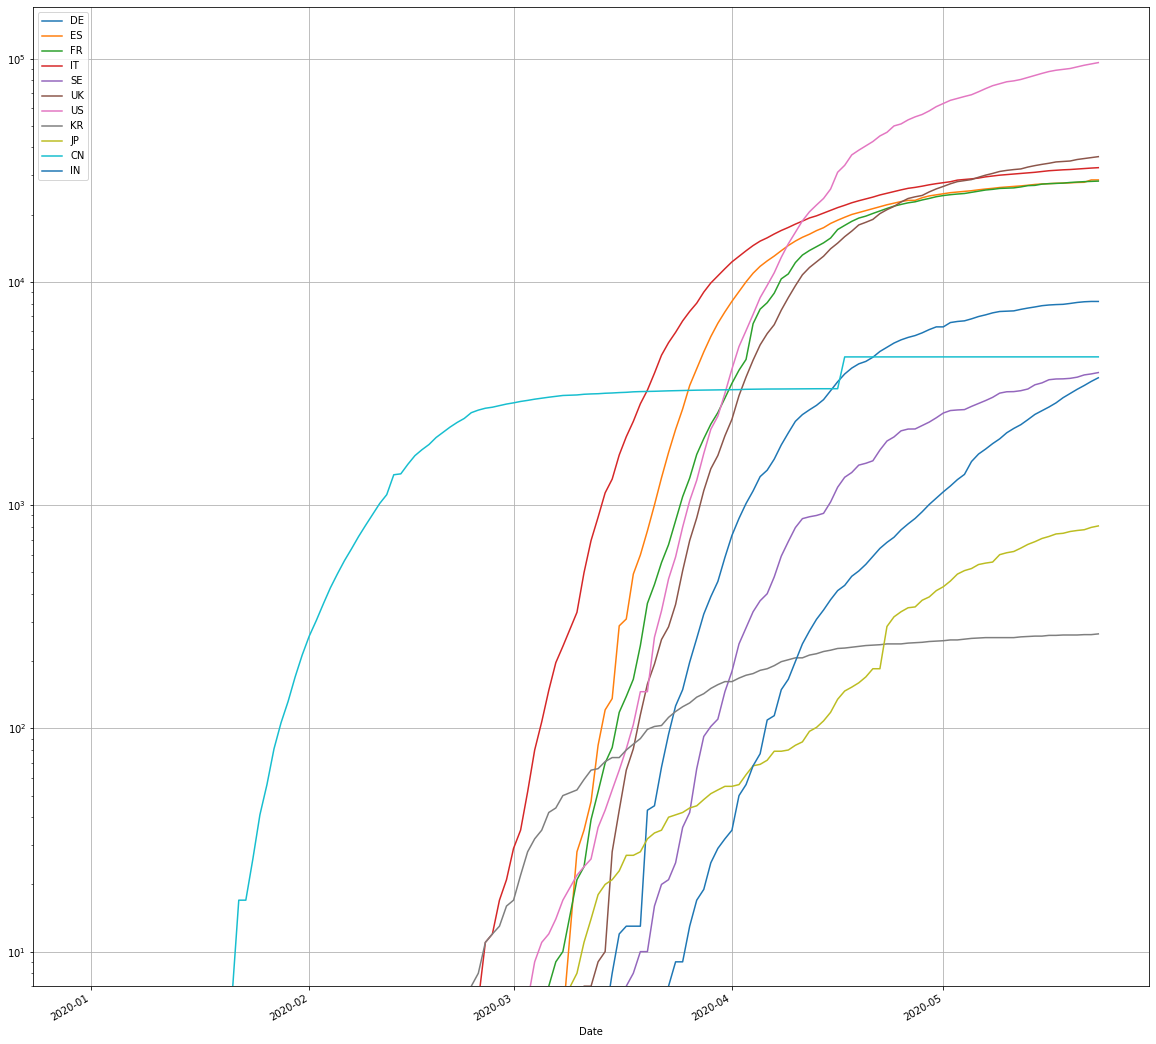

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-05-09,1251.0,743.0,642,1327,642,4649,26957,18,81,0,3320
12,2020-05-10,667.0,3416.0,433,1083,656,3896,25612,34,119,15,3277
11,2020-05-11,357.0,393.0,209,802,401,3923,20258,35,51,19,4213
10,2020-05-12,933.0,482.0,456,744,348,3877,18117,27,76,1,3604
9,2020-05-13,798.0,439.0,708,1402,602,3403,22048,26,150,7,3525
8,2020-05-14,933.0,849.0,507,888,637,3242,20782,29,55,6,3722
7,2020-05-15,913.0,643.0,622,992,673,3446,27143,27,114,5,3967
6,2020-05-16,620.0,515.0,563,789,625,3560,25508,19,44,9,3970
5,2020-05-17,583.0,652.0,372,875,470,3450,24487,13,48,6,4987
4,2020-05-18,342.0,256.0,120,675,466,3534,18873,15,20,10,5242


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-05-09,168496.0,223528.0,138011.0,215693.0,25223.0,211297.0,1283808.0,10592.0,15595.0,83931.0,59662.0
2020-05-10,169163.0,226944.0,138444.0,216776.0,25879.0,215193.0,1309420.0,10626.0,15714.0,83946.0,62939.0
2020-05-11,169520.0,227337.0,138653.0,217578.0,26280.0,219116.0,1329678.0,10661.0,15765.0,83965.0,67152.0
2020-05-12,170453.0,227819.0,139109.0,218322.0,26628.0,222993.0,1347795.0,10688.0,15841.0,83966.0,70756.0
2020-05-13,171251.0,228258.0,139817.0,219724.0,27230.0,226396.0,1369843.0,10714.0,15991.0,83973.0,74281.0
2020-05-14,172184.0,229107.0,140324.0,220612.0,27867.0,229638.0,1390625.0,10743.0,16046.0,83979.0,78003.0
2020-05-15,173097.0,229750.0,140946.0,221604.0,28540.0,233084.0,1417768.0,10770.0,16160.0,83984.0,81970.0
2020-05-16,173717.0,230265.0,141509.0,222393.0,29165.0,236644.0,1443276.0,10789.0,16204.0,83993.0,85940.0
2020-05-17,174300.0,230917.0,141881.0,223268.0,29635.0,240094.0,1467763.0,10802.0,16252.0,83999.0,90927.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-05-09,103.0,227.0,243,243,135,626,1510,0,44,0,95
12,2020-05-10,26.0,143.0,80,194,45,346,1614,0,12,0,128
11,2020-05-11,22.0,123.0,70,165,5,268,734,0,8,0,97
10,2020-05-12,116.0,176.0,263,179,31,210,1156,2,22,0,87
9,2020-05-13,101.0,184.0,348,172,57,627,1703,1,25,0,122
8,2020-05-14,89.0,217.0,83,195,147,494,1746,1,19,0,134
7,2020-05-15,101.0,138.0,351,262,69,428,1773,0,23,0,100
6,2020-05-16,57.0,104.0,130,242,117,384,1662,2,15,0,103
5,2020-05-17,33.0,87.0,88,153,28,468,1186,0,19,1,120
4,2020-05-18,21.0,59.0,68,145,5,170,808,1,5,0,157


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-05-09,7369.0,26478.0,26221.0,30068.0,3175.0,31241.0,77176.0,255.0,600.0,4614.0,1981.0
2020-05-10,7395.0,26621.0,26301.0,30262.0,3220.0,31587.0,78790.0,255.0,612.0,4614.0,2109.0
2020-05-11,7417.0,26744.0,26371.0,30427.0,3225.0,31855.0,79524.0,255.0,620.0,4614.0,2206.0
2020-05-12,7533.0,26920.0,26634.0,30606.0,3256.0,32065.0,80680.0,257.0,642.0,4614.0,2293.0
2020-05-13,7634.0,27104.0,26982.0,30778.0,3313.0,32692.0,82383.0,258.0,667.0,4614.0,2415.0
2020-05-14,7723.0,27321.0,27065.0,30973.0,3460.0,33186.0,84129.0,259.0,686.0,4614.0,2549.0
2020-05-15,7824.0,27459.0,27416.0,31235.0,3529.0,33614.0,85902.0,259.0,709.0,4614.0,2649.0
2020-05-16,7881.0,27563.0,27546.0,31477.0,3646.0,33998.0,87564.0,261.0,724.0,4614.0,2752.0
2020-05-17,7914.0,27650.0,27634.0,31630.0,3674.0,34466.0,88750.0,261.0,743.0,4615.0,2872.0
